In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-dataset-all-data-scienceanalyst-channels/Youtube_dataset_all_dataScience_channels.csv


*Importing the required libraries*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

In [3]:
df=pd.read_csv('/kaggle/input/youtube-dataset-all-data-scienceanalyst-channels/Youtube_dataset_all_dataScience_channels.csv')
df.head()

,Channel_Name,Title,Published_date,Views,Like_count,Comment_Count
0,DeepLearningAI,Learn to build multi-agent systems with divers...,2024-06-06,1650.0,1650.0,2.0
1,DeepLearningAI,New Course: AI Agents in LangGraph,2024-06-05,2472.0,2472.0,1.0
2,DeepLearningAI,New course on agents! Enroll in AI Agentic Des...,2024-05-29,3140.0,3140.0,5.0
3,DeepLearningAI,Learn to deploy AI models on edge devices like...,2024-05-28,2234.0,2234.0,0.0
4,DeepLearningAI,New course with Qualcomm: Introduction to On-D...,2024-05-21,2987.0,2987.0,6.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22958 entries, 0 to 22957
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Channel_Name    22958 non-null  object 
 1   Title           22958 non-null  object 
 2   Published_date  22958 non-null  object 
 3   Views           22956 non-null  float64
 4   Like_count      22956 non-null  float64
 5   Comment_Count   22931 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Views,Like_count,Comment_Count
count,2.295600e+04,2.295600e+04,22931.000000
mean,1.131562e+05,1.131562e+05,102.382539
std,5.389211e+05,5.389211e+05,431.059141
min,0.000000e+00,0.000000e+00,0.000000
25%,6.420500e+03,6.420500e+03,8.000000
50%,1.903850e+04,1.903850e+04,25.000000
75%,6.520050e+04,6.520050e+04,77.000000
max,4.419102e+07,4.419102e+07,44314.000000


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Views,22956.0,113156.169585,538921.132669,0.0,6420.5,19038.5,65200.5,44191019.0
Like_count,22956.0,113156.169585,538921.132669,0.0,6420.5,19038.5,65200.5,44191019.0
Comment_Count,22931.0,102.382539,431.059141,0.0,8.0,25.0,77.0,44314.0


In [7]:
df['Published_date'] = pd.to_datetime(df['Published_date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22958 entries, 0 to 22957
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Channel_Name    22958 non-null  object        
 1   Title           22958 non-null  object        
 2   Published_date  22958 non-null  datetime64[ns]
 3   Views           22956 non-null  float64       
 4   Like_count      22956 non-null  float64       
 5   Comment_Count   22931 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.1+ MB


In [9]:
df.shape

(22958, 6)

In [10]:
df.isnull().sum()

Channel_Name       0
Title              0
Published_date     0
Views              2
Like_count         2
Comment_Count     27
dtype: int64

*Filling the null values with the median value*

In [11]:
df['Views'].fillna(df['Views'].median(),inplace=True)
df['Like_count'].fillna(df['Like_count'].median(),inplace=True)
df['Comment_Count'].fillna(df['Comment_Count'].median(),inplace=True)

In [12]:
df.isnull().sum()

Channel_Name      0
Title             0
Published_date    0
Views             0
Like_count        0
Comment_Count     0
dtype: int64

In [13]:
desc=df['Channel_Name'].value_counts().sort_values(ascending=False)
desc

Channel_Name
WsCube Tech                    5158
ExcelIsFun                     3698
Krish Naik                     1834
freeCodeCamp.org               1669
sentdex                        1254
CampusX                        1050
Guy in a Cube                  1036
codebasics                      876
Kevin Stratvert                 854
Socratica                       661
Leila Gharani                   583
Tableau Tim                     508
Chandoo                         479
DeepLearningAI                  432
Kaggle                          380
Nicholas Renotte                308
Alex The Analyst                307
Ken Jee                         287
StatQuest with Josh Starmer     278
Tina Huang                      220
Luke Barousse                   159
Rob Mulla                       157
Ryan Nolan Data                 154
Darshil Parmar                  152
techTFQ                         136
Keith Galli                      89
Rishabh Mishra                   88
Thu Vu data ana

<Axes: title={'center': 'Data Science YT Channels v/s their Videos'}, xlabel='Channel Names', ylabel='Videos'>

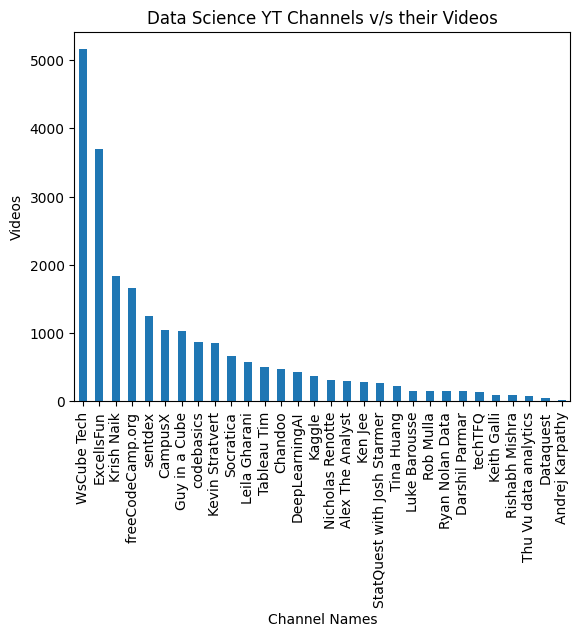

In [14]:
desc.plot(kind='bar', title='Data Science YT Channels v/s their Videos', xlabel='Channel Names', ylabel='Videos')

In [15]:
avglikes=df.groupby('Channel_Name')['Like_count'].mean().sort_values(ascending=False).reset_index()
avglikes

,Channel_Name,Like_count
0,Andrej Karpathy,690405.200000
1,Kevin Stratvert,491454.742389
2,Leila Gharani,434039.763293
3,freeCodeCamp.org,432369.472139
4,StatQuest with Josh Starmer,236140.107914
5,Rishabh Mishra,184760.681818
6,Keith Galli,170584.202247
7,Tina Huang,142059.900000
8,Luke Barousse,139121.314465
9,techTFQ,122410.080882


<Axes: title={'center': 'Average Likes on the Channels'}, xlabel='Channel Name', ylabel='Average Likes'>

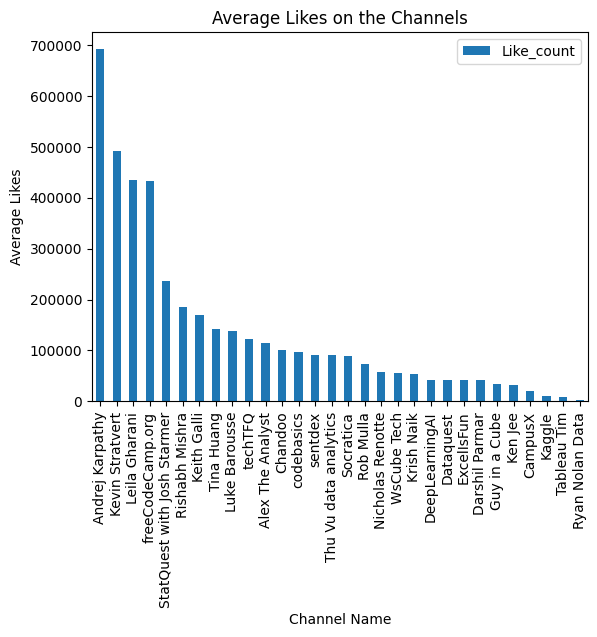

In [16]:
avglikes.plot(kind='bar', title='Average Likes on the Channels', x='Channel_Name',xlabel='Channel Name', ylabel='Average Likes')

In [17]:
avg_comments = df.groupby('Channel_Name')['Comment_Count'].mean().sort_values(ascending=False).reset_index()
avg_comments

,Channel_Name,Comment_Count
0,Andrej Karpathy,619.000000
1,Kevin Stratvert,382.600703
2,Leila Gharani,362.018868
3,Rishabh Mishra,349.386364
4,StatQuest with Josh Starmer,337.611511
5,freeCodeCamp.org,297.318155
6,Tina Huang,214.959091
7,Luke Barousse,190.226415
8,Alex The Analyst,177.957655
9,Keith Galli,176.438202


<Axes: title={'center': 'Average Comments on the Channels'}, xlabel='Channel Name', ylabel='Average Comments'>

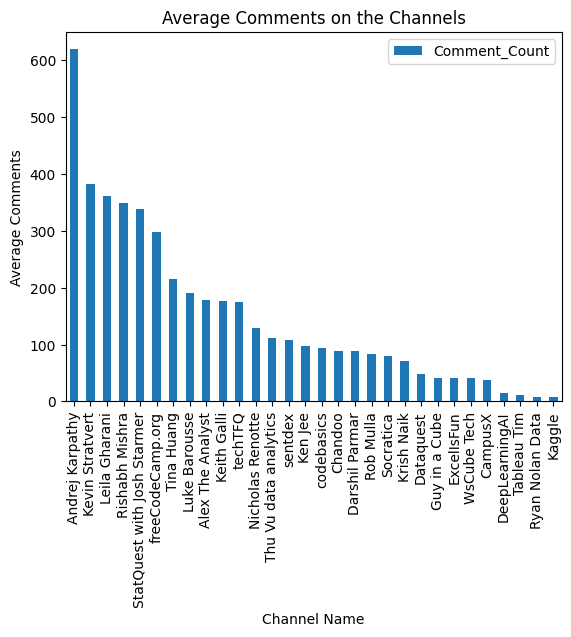

In [18]:
avg_comments.plot(kind='bar', title='Average Comments on the Channels', x='Channel_Name',xlabel='Channel Name', ylabel='Average Comments')

In [19]:
Total_Views = df.groupby('Channel_Name')['Views'].count().sort_values(ascending=False).reset_index()
Total_Views

,Channel_Name,Views
0,WsCube Tech,5158
1,ExcelIsFun,3698
2,Krish Naik,1834
3,freeCodeCamp.org,1669
4,sentdex,1254
5,CampusX,1050
6,Guy in a Cube,1036
7,codebasics,876
8,Kevin Stratvert,854
9,Socratica,661


<Axes: title={'center': 'Total Views on the Channels'}, xlabel='Channel Name', ylabel='Total Views'>

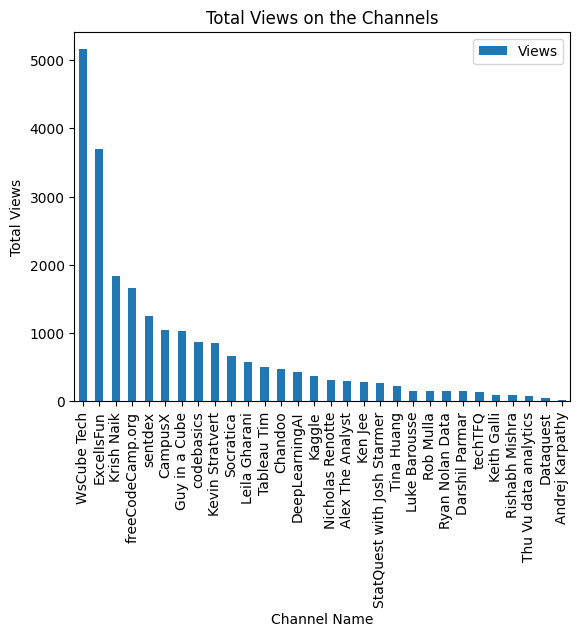

In [20]:
Total_Views.plot(kind='bar', title='Total Views on the Channels', x='Channel_Name',xlabel='Channel Name', ylabel='Total Views')

In [21]:
df['Month'] = df['Published_date'].apply(lambda x: x.month)
df['Year'] = df['Published_date'].apply(lambda x: x.year)
df.head()

,Channel_Name,Title,Published_date,Views,Like_count,Comment_Count,Month,Year
0,DeepLearningAI,Learn to build multi-agent systems with divers...,2024-06-06,1650.0,1650.0,2.0,6,2024
1,DeepLearningAI,New Course: AI Agents in LangGraph,2024-06-05,2472.0,2472.0,1.0,6,2024
2,DeepLearningAI,New course on agents! Enroll in AI Agentic Des...,2024-05-29,3140.0,3140.0,5.0,5,2024
3,DeepLearningAI,Learn to deploy AI models on edge devices like...,2024-05-28,2234.0,2234.0,0.0,5,2024
4,DeepLearningAI,New course with Qualcomm: Introduction to On-D...,2024-05-21,2987.0,2987.0,6.0,5,2024


In [22]:
views_per_yr = df.groupby('Year')['Views'].agg(['count','sum']).sort_values(by='sum',ascending=False).reset_index()
views_per_yr.rename(columns={'sum': 'Total Views','count':'Videos Count'}, inplace=True)

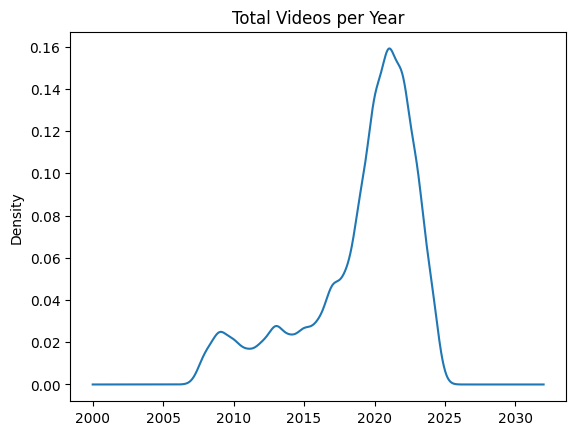

In [23]:
ax=df['Year'].plot(kind='kde', title='Total Videos per Year')

In [24]:
views_per_month = df.groupby('Month')['Views'].agg(['count','sum']).sort_values(by='sum',ascending=False).reset_index()
views_per_month.rename(columns={'sum': 'Total Views','count': 'Videos Count'}, inplace=True)
views_per_month

,Month,Videos Count,Total Views
0,8,1843,261911437.0
1,7,1923,259483638.0
2,3,2253,238643888.0
3,9,1693,224860568.0
4,4,1750,216437307.5
5,5,2112,212736588.5
6,1,1895,210884869.0
7,10,2000,203865622.0
8,6,1984,202541574.0
9,2,2050,200005418.0


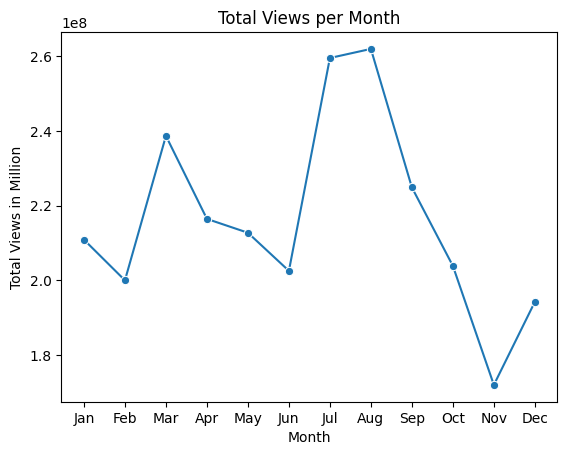

In [25]:

sns.lineplot(data=views_per_month, x='Month', y='Total Views', marker='o')
plt.title('Total Views per Month')
plt.xlabel('Month')
plt.ylabel('Total Views in Million')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

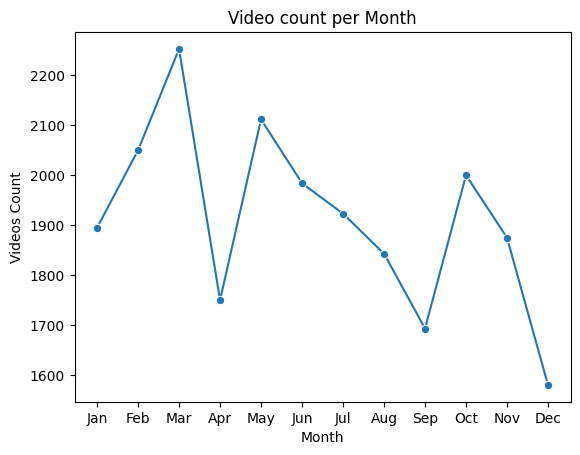

In [26]:
sns.lineplot(data=views_per_month, x='Month', y='Videos Count', marker='o')
plt.title('Video count per Month')
plt.xlabel('Month')
plt.ylabel('Videos Count')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [27]:
top10vid = df.nlargest(10,'Views')
top10vid

,Channel_Name,Title,Published_date,Views,Like_count,Comment_Count,Month,Year
20913,freeCodeCamp.org,Learn Python - Full Course for Beginners [Tuto...,2018-07-11,44191019.0,44191019.0,44314.0,7,2018
11210,WsCube Tech,Ethical HACKING Full Course in 10 HOURS (Begin...,2021-08-29,22003831.0,22003831.0,7772.0,8,2021
20930,freeCodeCamp.org,SQL Tutorial - Full Database Course for Beginners,2018-07-02,18048065.0,18048065.0,11098.0,7,2018
20720,freeCodeCamp.org,Learn JavaScript - Full Course for Beginners,2018-12-10,17075237.0,17075237.0,8540.0,12,2018
20860,freeCodeCamp.org,C++ Tutorial for Beginners - Full Course,2018-08-24,12260170.0,12260170.0,11965.0,8,2018
20872,freeCodeCamp.org,C Programming Tutorial for Beginners,2018-08-15,11353737.0,11353737.0,6674.0,8,2018
20124,freeCodeCamp.org,Harvard CS50 – Full Computer Science Universit...,2022-10-19,11083884.0,11083884.0,7324.0,10,2022
17594,codebasics,Don't put toy dataset projects on your resume!,2024-03-22,9311413.0,9311413.0,541.0,3,2024
20442,freeCodeCamp.org,Microsoft Excel Tutorial for Beginners - Full ...,2020-10-28,8998280.0,8998280.0,2446.0,10,2020
20547,freeCodeCamp.org,Introduction to Programming and Computer Scien...,2020-04-21,8255812.0,8255812.0,4095.0,4,2020


In [28]:
import plotly.express as px
top10 = px.bar(top10vid,
             x='Views', y='Title',
             title="Top 10 Data Science videos with highest views")
top10.show()

*Thus, we managed to find the top 10 videos on youtube, related to data science!*